In [2]:
import pandas as pd

# Load the dataset
file_name = '/content/annual_temp (2).csv'
df = pd.read_csv(file_name)

# Preview the dataset
preview = df.head()
preview

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Encode the 'Source' column
df['Source'] = df['Source'].astype('category').cat.codes

In [4]:
df.head(5)

,Source,Year,Mean
0,0,2015,0.8990
1,1,2015,0.8700
2,0,2014,0.7402
3,1,2014,0.7500
4,0,2013,0.6687


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  272 non-null    int8   
 1   Year    272 non-null    int64  
 2   Mean    272 non-null    float64
dtypes: float64(1), int64(1), int8(1)
memory usage: 4.6 KB


In [6]:
# Split the data into features and target
X = df[['Source', 'Year']]
y = df['Mean']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

# Initialize models
linear_model = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
polynomial_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100)
decision_tree_model = DecisionTreeRegressor()
svr_model = SVR(kernel='rbf')

# Train models
linear_model.fit(X_train, y_train)
polynomial_model.fit(X_train_poly, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

SVR()

In [8]:
# Make predictions on test set
X_test_poly = polynomial_features.transform(X_test)
linear_predictions = linear_model.predict(X_test)
polynomial_predictions = polynomial_model.predict(X_test_poly)
random_forest_predictions = random_forest_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Collect results into a dictionary
predictions = {
    'Linear Regression': linear_predictions,
    'Polynomial Regression': polynomial_predictions,
    'Random Forest': random_forest_predictions,
    'Decision Tree': decision_tree_predictions,
    'SVR': svr_predictions
}

In [13]:
print(predictions['Random Forest'])

[ 0.449409  0.07847  -0.035645 -0.05802  -0.311139 -0.051435 -0.4124
  0.29358  -0.137552 -0.285932 -0.240385 -0.159965 -0.168639  0.04114
 -0.202215 -0.254363 -0.144035  0.163508  0.059035  0.152924 -0.361049
 -0.158633  0.304691  0.333376 -0.251383  0.663239  0.594513 -0.260275
 -0.006612  0.598283  0.000767  0.282356  0.210903 -0.361201 -0.152807
  0.60741  -0.052068  0.259755 -0.099291 -0.025879  0.602246 -0.049359
 -0.294065  0.669488  0.098846 -0.316225  0.034657 -0.381176 -0.01267
 -0.199638  0.626711 -0.019275 -0.16365  -0.263109  0.023517]


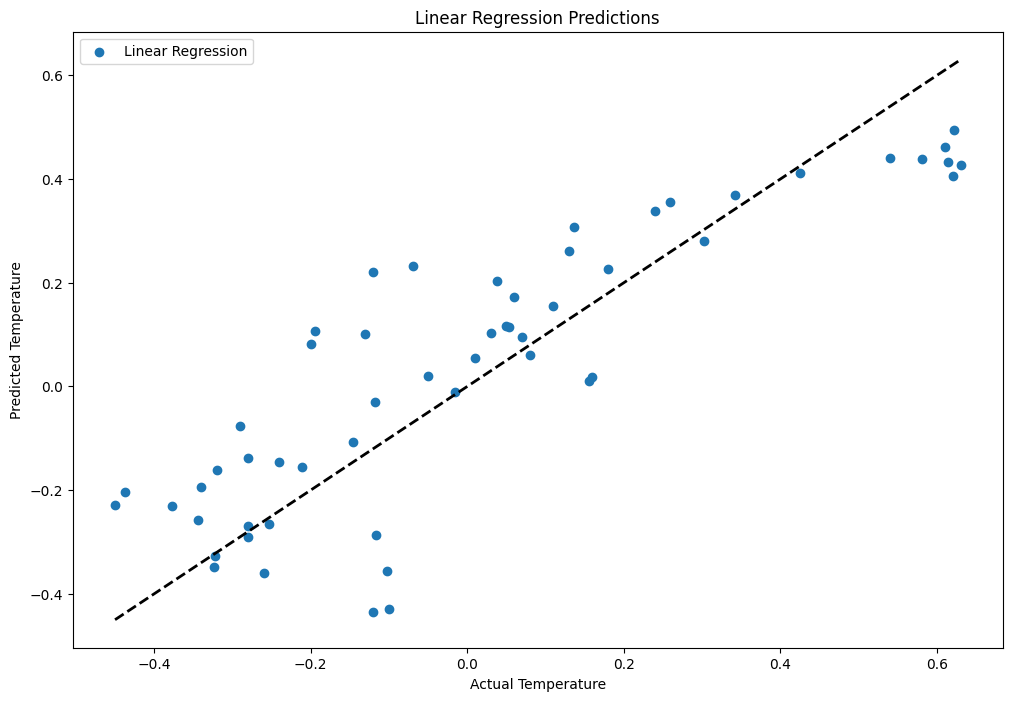

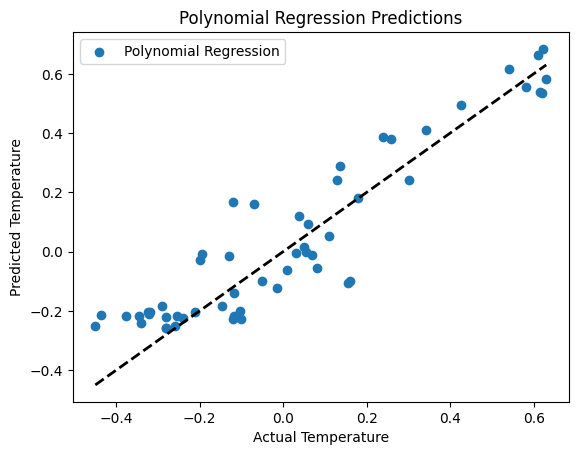

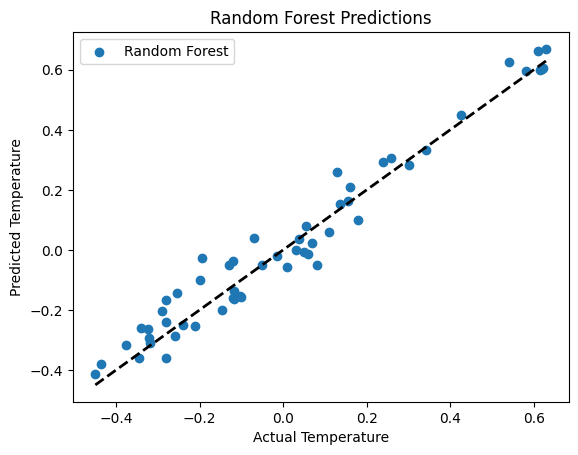

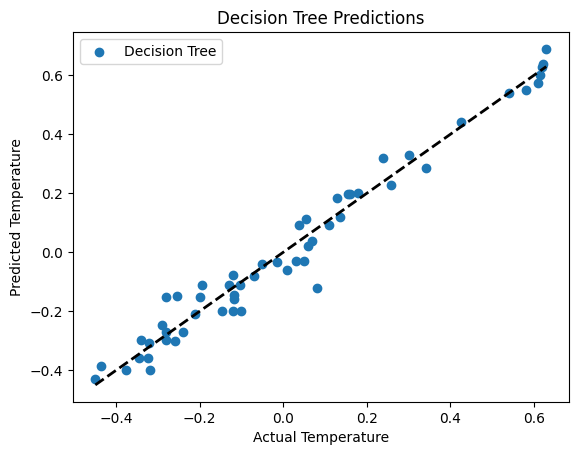

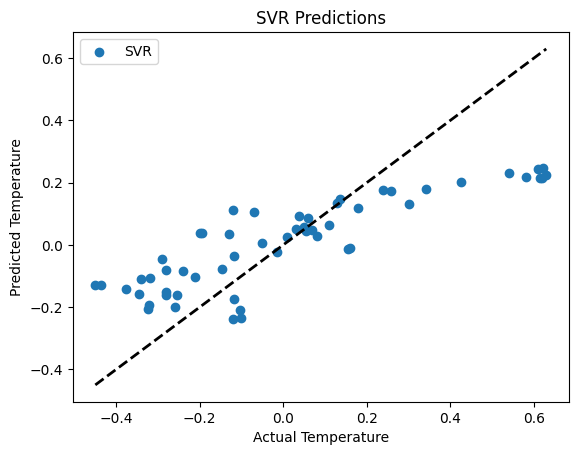

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for model, preds in predictions.items():
    plt.scatter(y_test, preds, label=model)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Temperature')
    plt.ylabel('Predicted Temperature')
    plt.title(f'{model} Predictions')
    plt.legend()
    plt.show()

In [10]:
from sklearn.metrics import r2_score

for model, preds in predictions.items():
    r2 = r2_score(y_test, preds)
    print(f'{model} R-squared: {r2:.2f}')

Linear Regression R-squared: 0.73
Polynomial Regression R-squared: 0.85
Random Forest R-squared: 0.96
Decision Tree R-squared: 0.97
SVR R-squared: 0.59


In [12]:
import numpy as np

# Prepare the data for prediction
# Assuming 'GCAG' and 'GISTEMP' are encoded as 0 and 1
years_to_predict = pd.DataFrame({
    'Source': [0, 1, 0, 1],  # GCAG and GISTEMP for 2016 and 2017
    'Year': [2016, 2016, 2017, 2017]
})

# Make predictions using the Random Forest model
predictions_2016_2017 = random_forest_model.predict(years_to_predict)

# Display the predictions
predictions_df = pd.DataFrame({
    'Year': [2016, 2016, 2017, 2017],
    'Source': ['GCAG', 'GISTEMP', 'GCAG', 'GISTEMP'],
    'Predicted Mean Temperature': predictions_2016_2017
})

print(predictions_df)

   Year   Source  Predicted Mean Temperature
0  2016     GCAG                    0.862307
1  2016  GISTEMP                    0.852716
2  2017     GCAG                    0.862307
3  2017  GISTEMP                    0.852716
